# Classification

In [1]:
import csv
import pandas as pd
import datetime
import random
# utilities
import re
import numpy as np
# plotting
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Data Preprocessing & NLP
import nltk
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
#nltk.download('wordnet')
#nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
#from sklearn.model_selection import SVD
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
skills_df =pd.read_csv('Skills.csv')

## Exploratory Data Analysis

In [5]:
skills_df.columns

Index(['O*NET-SOC Code', 'Title', 'Example', 'Commodity Code',
       'Commodity Title', 'Hot Technology'],
      dtype='object')

In [6]:
skills_df.sample(5)

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
22884,41-4012.00,"Sales Representatives, Wholesale and Manufactu...",Google Analytics,43232307,Data mining software,Y
9902,15-1199.11,Video Game Designers,Lua,43232405,Object or component oriented development software,N
26477,51-3011.00,Bakers,SweetWARE SmallPICS,43231602,Enterprise resource planning ERP software,Y
1986,11-9051.00,Food Service Managers,Intuit QuickBooks,43231601,Accounting software,Y
382,11-2021.00,Marketing Managers,Microsoft Excel,43232110,Spreadsheet software,Y


In [7]:
skills_df.shape

(27858, 6)

In [8]:
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27858 entries, 0 to 27857
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   O*NET-SOC Code   27858 non-null  object
 1   Title            27858 non-null  object
 2   Example          27858 non-null  object
 3   Commodity Code   27858 non-null  int64 
 4   Commodity Title  27858 non-null  object
 5   Hot Technology   27858 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [9]:
skills_df.describe()

,Commodity Code
count,2.785800e+04
mean,4.323234e+07
std,4.923552e+02
min,4.323150e+07
25%,4.323210e+07
50%,4.323231e+07
75%,4.323260e+07
max,4.323370e+07


In [10]:
np.sum(skills_df.isnull().any(axis=1))

0

In [11]:
skills_df.groupby('Example').describe()

Commodity Code                   \
                                                   count        mean  std   
Example                                                                     
!Trak-it Solutions !Trak-it HR                       1.0  43231505.0  NaN   
100 Plus Hatch Pattern Library                       1.0  43232101.0  NaN   
1003 Uniform Residential Loan Application            1.0  43231604.0  NaN   
1099 ProsSoftware                                    1.0  43231603.0  NaN   
1CadCam Unigraphics                                  7.0  43232612.0  0.0   
...                                                  ...         ...  ...   
web2project                                          1.0  43231507.0  NaN   
xQuery                                               1.0  43232306.0  NaN   
yieldWerx                                            1.0  43232605.0  NaN   
z-Tree                                               2.0  43232605.0  0.0   
zkipster                                             1.0  43231507.0  NaN   

                                                                               \
                                                  min         25%         50%   
Example                                                                         
!Trak-it Solutions !Trak-it HR             43231505.0  43231505.0  43231505.0   
100 Plus Hatch Pattern Library             43232101.0  43232101.0  43232101.0   
1003 Uniform Residential Loan Application  43231604.0  43231604.0  43231604.0   
1099 ProsSoftware                          43231603.0  43231603.0  43231603.0   
1CadCam Unigraphics                        43232612.0  43232612.0  43232612.0   
...                                               ...         ...         ...   
web2project                                43231507.0  43231507.0  43231507.0   
xQuery                                     43232306.0  43232306.0  43232306.0   
yieldWerx                                  43232605.0  43232605.0  43232605.0   
z-Tree                                     43232605.0  43232605.0  43232605.0   
zkipster                                   43231507.0  43231507.0  43231507.0   

                                                                   
                                                  75%         max  
Example                                                            
!Trak-it Solutions !Trak-it HR             43231505.0  43231505.0  
100 Plus Hatch Pattern Library             43232101.0  43232101.0  
1003 Uniform Residential Loan Application  43231604.0  43231604.0  
1099 ProsSoftware                          43231603.0  43231603.0  
1CadCam Unigraphics                        43232612.0  43232612.0  
...                                               ...         ...  
web2project                                43231507.0  43231507.0  
xQuery                                     43232306.0  43232306.0  
yieldWerx                                  43232605.0  43232605.0  
z-Tree                                     43232605.0  43232605.0  
zkipster                                   43231507.0  43231507.0  

[8824 rows x 8 columns]

In [12]:
skills_df.groupby('Title').describe()

Commodity Code  \
                                                            count   
Title                                                               
Accountants                                                 160.0   
Actors                                                       11.0   
Actuaries                                                    37.0   
Acupuncturists                                                8.0   
Acute Care Nurses                                            18.0   
...                                                           ...   
Wind Energy Project Managers                                 12.0   
Wind Turbine Service Technicians                             14.0   
Woodworking Machine Setters, Operators, and Ten...            6.0   
Word Processors and Typists                                  19.0   
Zoologists and Wildlife Biologists                           26.0   

                                                                              \
                                                            mean         std   
Title                                                                          
Accountants                                         4.323187e+07  460.163195   
Actors                                              4.323236e+07  624.598591   
Actuaries                                           4.323211e+07  452.311529   
Acupuncturists                                      4.323255e+07  176.776695   
Acute Care Nurses                                   4.323249e+07  293.276783   
...                                                          ...         ...   
Wind Energy Project Managers                        4.323236e+07  799.854016   
Wind Turbine Service Technicians                    4.323234e+07  554.255842   
Woodworking Machine Setters, Operators, and Ten...  4.323216e+07  574.757601   
Word Processors and Typists                         4.323219e+07  567.141746   
Zoologists and Wildlife Biologists                  4.323247e+07  604.715257   

                                                                             \
                                                           min          25%   
Title                                                                         
Accountants                                         43231505.0  43231601.00   
Actors                                              43231513.0  43232103.00   
Actuaries                                           43231513.0  43231604.00   
Acupuncturists                                      43232110.0  43232610.00   
Acute Care Nurses                                   43231513.0  43232610.00   
...                                                        ...          ...   
Wind Energy Project Managers                        43231507.0  43231579.75   
Wind Turbine Service Technicians                    43231507.0  43232104.50   
Woodworking Machine Setters, Operators, and Ten...  43231508.0  43231729.75   
Word Processors and Typists                         43231507.0  43231852.00   
Zoologists and Wildlife Biologists                  43231507.0  43232110.00   

                                                                            \
                                                           50%         75%   
Title                                                                        
Accountants                                         43231603.0  43232303.5   
Actors                                              43232107.0  43232406.0   
Actuaries                                           43232110.0  43232402.0   
Acupuncturists                                      43232610.0  43232610.0   
Acute Care Nurses                                   43232610.0  43232610.0   
...                                                        ...         ...   
Wind Energy Project Managers                        43232108.0  43232904.0   
Wind Turbine Service Technicians                    43232604.0  43232608.0  

In [13]:
skills_df.groupby('Hot Technology').describe()

Commodity Code                                        \
                        count          mean         std         min   
Hot Technology                                                        
N                     15465.0  4.323239e+07  478.414340  43231501.0   
Y                     12393.0  4.323228e+07  502.611387  43231505.0   

                                                                
                       25%         50%         75%         max  
Hot Technology                                                  
N               43232108.0  43232405.0  43232610.0  43233701.0  
Y               43232104.0  43232306.0  43232604.0  43233701.0

In [14]:
skills_df.groupby('Commodity Title').describe()

Commodity Code                   \
                                                count        mean  std   
Commodity Title                                                          
Access software                                  64.0  43232901.0  0.0   
Accounting software                             484.0  43231601.0  0.0   
Action games                                      4.0  43232001.0  0.0   
Administration software                          45.0  43232804.0  0.0   
Analytical or scientific software              2774.0  43232605.0  0.0   
...                                               ...         ...  ...   
WAN switching software and firmware               8.0  43232909.0  0.0   
Web page creation and editing software          284.0  43232107.0  0.0   
Web platform development software               682.0  43232408.0  0.0   
Wireless software                                 1.0  43232910.0  NaN   
Word processing software                       1176.0  43232104.0  0.0   

                                                                            \
                                               min         25%         50%   
Commodity Title                                                              
Access software                         43232901.0  43232901.0  43232901.0   
Accounting software                     43231601.0  43231601.0  43231601.0   
Action games                            43232001.0  43232001.0  43232001.0   
Administration software                 43232804.0  43232804.0  43232804.0   
Analytical or scientific software       43232605.0  43232605.0  43232605.0   
...                                            ...         ...         ...   
WAN switching software and firmware     43232909.0  43232909.0  43232909.0   
Web page creation and editing software  43232107.0  43232107.0  43232107.0   
Web platform development software       43232408.0  43232408.0  43232408.0   
Wireless software                       43232910.0  43232910.0  43232910.0   
Word processing software                43232104.0  43232104.0  43232104.0   

                                                                
                                               75%         max  
Commodity Title                                                 
Access software                         43232901.0  43232901.0  
Accounting software                     43231601.0  43231601.0  
Action games                            43232001.0  43232001.0  
Administration software                 43232804.0  43232804.0  
Analytical or scientific software       43232605.0  43232605.0  
...                                            ...         ...  
WAN switching software and firmware     43232909.0  43232909.0  
Web page creation and editing software  43232107.0  43232107.0  
Web platform development software       43232408.0  43232408.0  
Wireless software                       43232910.0  43232910.0  
Word processing software                43232104.0  43232104.0  

[127 rows x 8 columns]

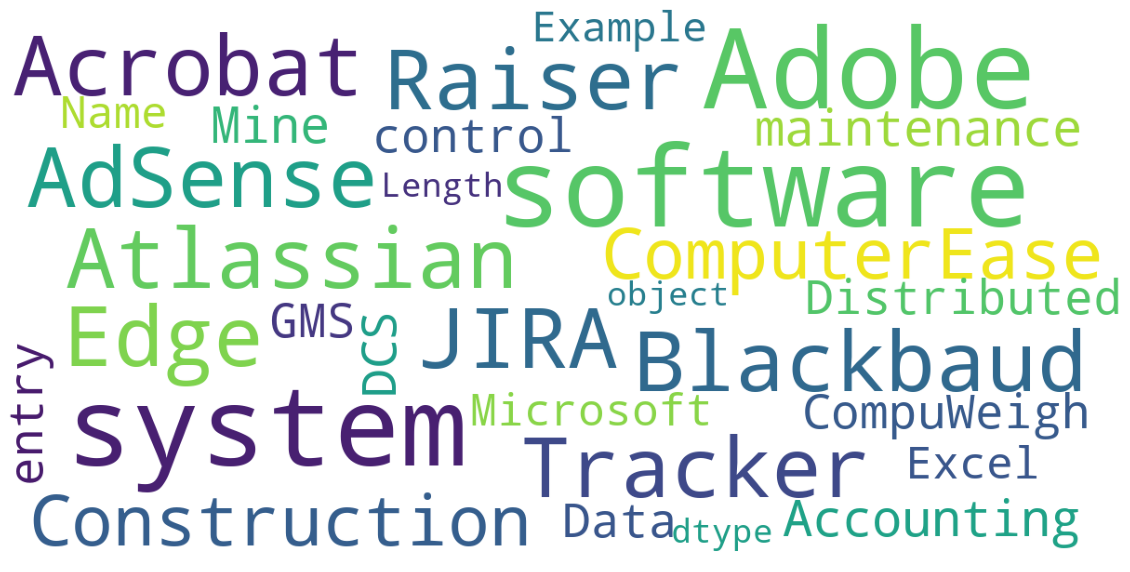

In [15]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(skills_df["Example"])

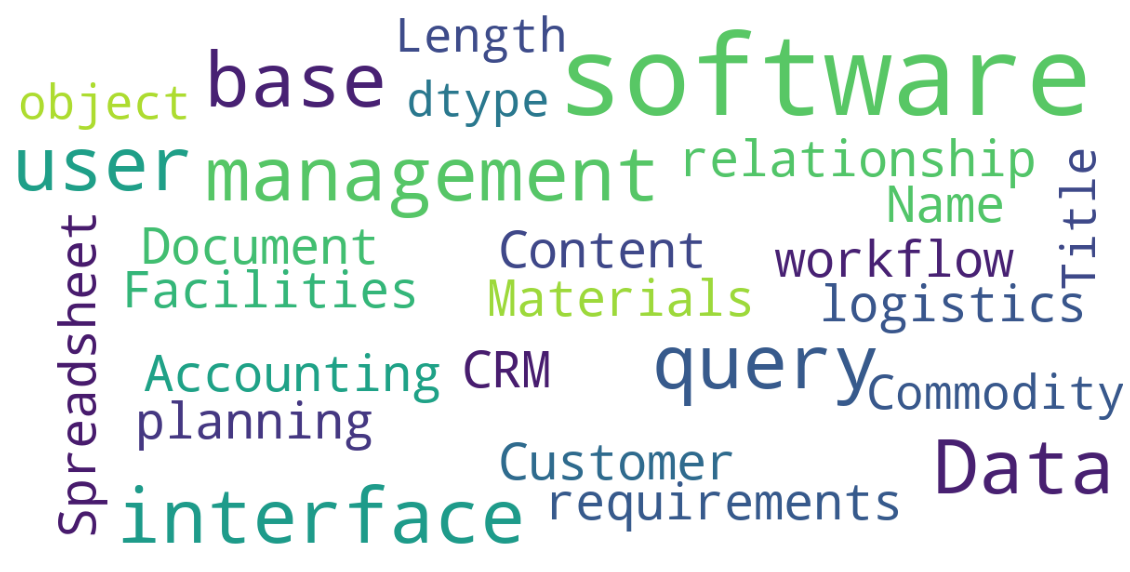

In [16]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(skills_df["Commodity Title"])

<AxesSubplot:xlabel='Hot Technology', ylabel='count'>

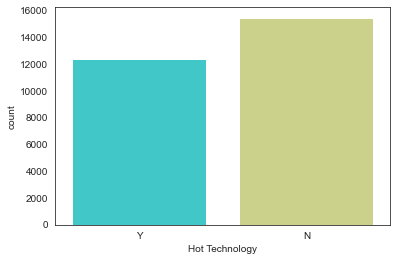

In [17]:
sns.countplot(x='Hot Technology',data=skills_df,palette='rainbow')

In [18]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [19]:
skills_df.groupby('Commodity Title').count()['Commodity Code'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                           title='Bar chart of Commodity Title', xTitle='Commodity Title')

In [23]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(skills_df['Commodity Title'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Commodity Title' , 'count'])
df1.groupby('Commodity Title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black',color="blue", title='Top 20 words in "Commodity Title" column')

software 27845
or 5036
and 3930
data 3305
base 2985
analytical 2774
scientific 2774
management 2530
user 2379
interface 2379
query 2363
development 2296
computer 1655
medical 1519
enterprise 1315
system 1313
planning 1260
aided 1257
word 1176
processing 1176


In [27]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(skills_df['Commodity Title'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Commodity Title' , 'count'])
df4.groupby('Commodity Title').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black',color='blue', title='Top 20 bigrams in "Commodity Title" column')

data base 2985
analytical scientific 2774
scientific software 2774
user interface 2379
base user 2363
interface query 2363
query software 2363
management software 2192
medical software 1519
development software 1385
computer aided 1257
word processing 1176
processing software 1176
spreadsheet software 1050
aided design 1047
design cad 1047
enterprise resource 1046
resource planning 1046
planning erp 1046
erp software 1046


In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(skills_df['Example'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Example' , 'count'])
df1.groupby('Example').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', color='red',linecolor="black", title='Top 20 words in "Example" column')

software 6462
microsoft 5174
adobe 1644
systems 1579
management 990
word 950
excel 858
system 843
office 836
oracle 755
data 615
language 572
powerpoint 535
ibm 534
web 502
and 489
browser 474
outlook 431
sap 377
pro 365


## Text Pre-processing

In [23]:
#Dropping irrelevent columns
columns_to_delete = ['O*NET-SOC Code','Commodity Code']
skills_df.drop(columns_to_delete, inplace=True, axis=1)

In [24]:
skills_df['Commodity Title']

0                             Document management software
1              Data base user interface and query software
2                                Content workflow software
3            Customer relationship management CRM software
4                                      Accounting software
                               ...                        
27853                       Facilities management software
27854          Data base user interface and query software
27855          Data base user interface and query software
27856    Materials requirements planning logistics and ...
27857                                 Spreadsheet software
Name: Commodity Title, Length: 27858, dtype: object

In [25]:
#Removing software from last sentence
skills_df['Commodity Title']=skills_df['Commodity Title'].str.rsplit(' ',1).str[0]

In [26]:
skills_df['Commodity Title']

0                                      Document management
1                       Data base user interface and query
2                                         Content workflow
3                     Customer relationship management CRM
4                                               Accounting
                               ...                        
27853                                Facilities management
27854                   Data base user interface and query
27855                   Data base user interface and query
27856    Materials requirements planning logistics and ...
27857                                          Spreadsheet
Name: Commodity Title, Length: 27858, dtype: object

In [27]:
skills_df.sample(5)

,Title,Example,Commodity Title,Hot Technology
2911,"Insurance Adjusters, Examiners, and Investigators",CCC GuidePost Decision Support,Expert system,N
237,Advertising and Promotions Managers,Data visualization software,Analytical or scientific,N
20098,Occupational Therapists,Microsoft Excel,Spreadsheet,Y
18614,Program Directors,Broadcast Electronics AudioVAULT FleX,Music or sound editing,N
13731,Microbiologists,TreeView,Analytical or scientific,N


In [28]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [29]:
# creating clean text feature
features = ['Title', 'Commodity Title','Example']
for feature in features:
    skills_df['Clean_' + feature] = skills_df[feature].apply(clean_text)

In [30]:
skills_df.sample(5)

,Title,Example,Commodity Title,Hot Technology,Clean_Title,Clean_Commodity Title,Clean_Example
5782,Computer Systems Analysts,SAP,Enterprise resource planning ERP,Y,computer systems analysts,enterprise resource planning erp,sap
2087,Medical and Health Services Managers,Emdeon HealthPro,Medical,N,medical and health services managers,medical,emdeon healthpro
10433,"Architects, Except Landscape and Naval",Apache Pig,Data base management system,Y,architects except landscape and naval,data base management system,apache pig
5134,Financial Examiners,Microsoft Visio,Graphics or photo imaging,Y,financial examiners,graphics or photo imaging,microsoft visio
60,General and Operations Managers,Adobe Systems Adobe Photoshop,Graphics or photo imaging,Y,general and operations managers,graphics or photo imaging,adobe systems adobe photoshop


# Part 2. Visualization

In [31]:
skills_df['soup'] = skills_df['Clean_Title'] + skills_df['Clean_Commodity Title'] + skills_df['Clean_Example']

In [32]:
skills_df.sample(2)

,Title,Example,Commodity Title,Hot Technology,Clean_Title,Clean_Commodity Title,Clean_Example,soup
6814,"Software Developers, Systems Software",Fault testing software,Program testing,N,software developers systems software,program testing,fault testing software,software developers systems softwareprogram te...
769,Computer and Information Systems Managers,Progress OpenEdge Fathom Replication software,Data base management system,N,computer and information systems managers,data base management system,progress openedge fathom replication software,computer and information systems managersdata ...


In [33]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

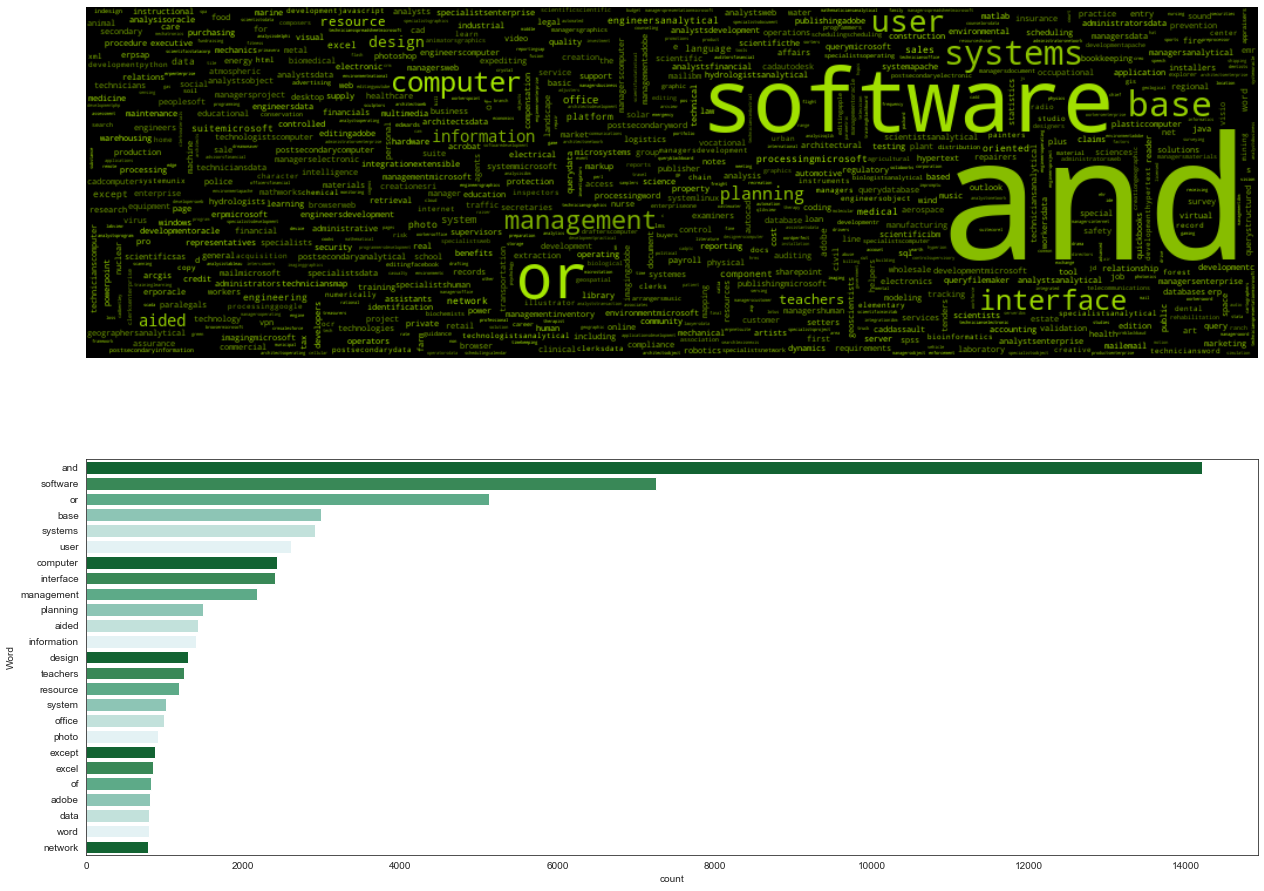

In [34]:
# plot 25 most frequent words including stop words
freq_words(skills_df['soup'], 25)

In [35]:
# stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
skills_df['soup'] = skills_df['soup'].apply(lambda x: remove_stopwords(x))

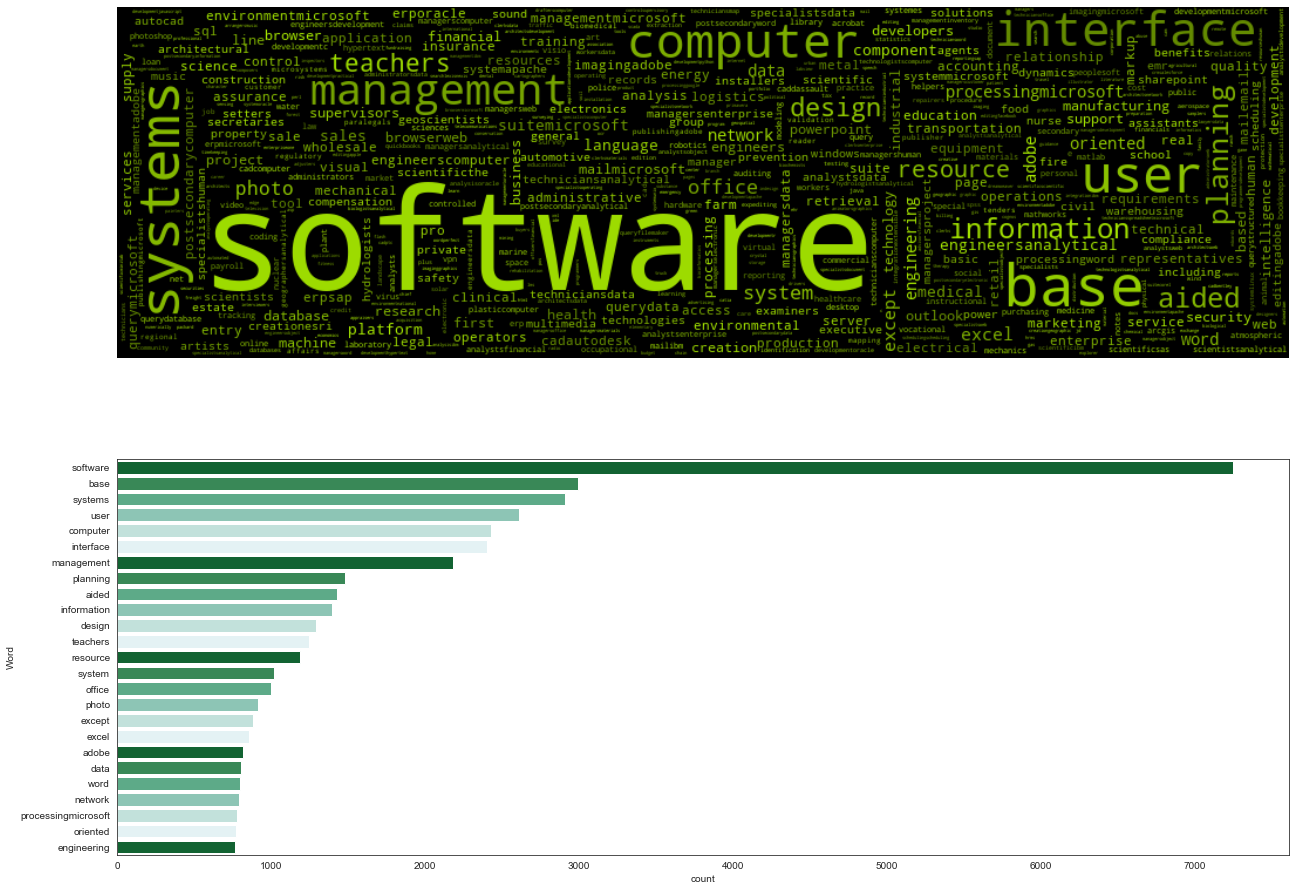

In [36]:
# plot 25 most frequent words without stopwords
freq_words(skills_df['soup'], 25)

# Part 3: Heading to Machine Learning

## 3.1. Text Mining Algorithms

In [37]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [38]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [39]:
skills_df.columns

Index(['Title', 'Example', 'Commodity Title', 'Hot Technology', 'Clean_Title',
       'Clean_Commodity Title', 'Clean_Example', 'soup'],
      dtype='object')

In [40]:
skills_df.sample(5)

,Title,Example,Commodity Title,Hot Technology,Clean_Title,Clean_Commodity Title,Clean_Example,soup
11595,Industrial Engineers,PTC Creo Parametric,Computer aided design CAD,Y,industrial engineers,computer aided design cad,ptc creo parametric,industrial engineerscomputer aided design cadp...
12452,Nanosystems Engineers,MAYA Nastran,Analytical or scientific,N,nanosystems engineers,analytical or scientific,maya nastran,nanosystems engineersanalytical scientificmaya...
25090,Log Graders and Scalers,Atterbury Consultants SuperACE/FLIPS,Inventory management,N,log graders and scalers,inventory management,atterbury consultants superace flips,log graders scalersinventory managementatterbu...
3544,Management Analysts,Extensible markup language XML,Enterprise application integration,Y,management analysts,enterprise application integration,extensible markup language xml,management analystsenterprise application inte...
18193,Multimedia Artists and Animators,Adobe Systems Adobe Flex,Web platform development,N,multimedia artists and animators,web platform development,adobe systems adobe flex,multimedia artists animatorsweb platform devel...


In [41]:
mb = MultiLabelBinarizer()
y=mb.fit_transform(skills_df['Commodity Title'].dropna().str.split(', ')) 
print (y)
print(mb.classes_ )
#y = mb.transform(skills_df['Example'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['Access' 'Accounting' 'Action' 'Administration'
 'Analytical or scientific' 'Application server' 'Audit'
 'Authentication server' 'Aviation ground support' 'Backup or archival'
 'Bar coding' 'Bridge' 'Business intelligence and data analysis'
 'Calendar and scheduling' 'Categorization or classification' 'Charting'
 'Clustering' 'Communications server' 'Compiler and decompiler'
 'Compliance' 'Computer aided design CAD'
 'Computer aided design CAD and computer aided manufacturing CAM'
 'Computer aided manufacturing CAM' 'Computer based training'
 'Configuration management' 'Contact center' 'Content workflow'
 'Customer relationship management CRM' 'Data base management system'
 'Data base reporting' 'Data base user interface and query'
 'Data compression' 'Data conversion' 'Data mining'
 'Desktop communications' 'Desktop publishing' 'Development environment'
 'Device dr

In [44]:
# Basic validation: splitting the data 80-20 train/test
X_train, X_test, y_train, y_test = train_test_split(skills_df['soup'], y, test_size=0.2, random_state=55)

In [45]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(22286, 10000)

In [46]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [47]:
xtrain_cv.shape

(22286, 10000)

In [48]:
# to hold model's results
evaluation_list=[]

### Model Evaluation Function

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
def model_Evaluate(model):
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## 3.2. Classification

### Logistic Regression

In [50]:
log_reg = LogisticRegression(C=10, penalty='l2')
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10))

In [51]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 91.01
Precision : 0.9912177985948478
Recall    : 0.9115218951902369
F1-score   : 0.9497008227374719


In [52]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [53]:
mb.inverse_transform(y_pred)[14]

('Word processing',)

### Multinomial Naive Bayes

In [54]:
nbayes = MultinomialNB(alpha=0)
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=0))

In [55]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Multinomial Naive Bayes.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Multinomial Naive Bayes.: % 87.28
Precision : 0.9606191222570533
Recall    : 0.8799353912419239
F1-score   : 0.9185088047958037


In [56]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'MultinomialNB'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [57]:
mb.inverse_transform(y_pred)[14]

('Word processing',)

### Linear SVC (Linear SVM)

In [58]:
linear_svc = LinearSVC(C=10, penalty='l2')
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=10))

In [59]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Linear SVC.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Linear SVC.: % 94.19
Precision : 0.9806942639688138
Recall    : 0.9481335247666905
F1-score   : 0.9641390637831919


In [60]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'LinearSVC'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [61]:
mb.inverse_transform(y_pred)[14]

('Word processing',)

### Random Forest

In [62]:
#Takes a lot of time

In [63]:
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [64]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Random Forest.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Random Forest.: % 91.65
Precision : 0.9792301829268293
Recall    : 0.9222900215362527
F1-score   : 0.9499075785582255


In [65]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Random Forest'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### XGBoost

In [66]:
#Takes a lot of time

In [67]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
oneVsRest_xgb = OneVsRestClassifier(XGB)
oneVsRest_xgb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
     

In [68]:
y_pred = oneVsRest_xgb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic XGboost.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic XGboost.: % 88.71
Precision : 0.9859350237717908
Recall    : 0.8932160804020101
F1-score   : 0.9372881355932202


In [69]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'XGBoost'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

## Kernel SVM

In [74]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10, gamma=0.1)
oneVsRest_svm = OneVsRestClassifier(svm)
oneVsRest_svm.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=SVC(C=10, gamma=0.1))

In [71]:
y_pred = oneVsRest_svm.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Kernel SVM.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Kernel SVM.: % 93.75
Precision : 0.9873799208890564
Recall    : 0.9407753050969131
F1-score   : 0.9635143828692215


In [72]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'SVM'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### Performance metrics of models

In [75]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

,Test Accuracy,Precision,Recall,F1
Model,,,,
LinearSVC,94.19,0.98,0.95,0.96
SVM,93.75,0.99,0.94,0.96
Random Forest,91.65,0.98,0.92,0.95
Logistic Regression,91.01,0.99,0.91,0.95
XGBoost,88.71,0.99,0.89,0.94
MultinomialNB,87.28,0.96,0.88,0.92


### Optimization-GridSearch 

In [61]:
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [62]:
oneVsRest.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [64]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
svc_grid = GridSearchCV(oneVsRest_svc, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
svc_grid.fit(xtrain_tfidf, y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.                nan 0.1342985         nan 0.91188617
        nan 0.91207738]
  warnings.warn(
D:\Programs\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 261 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
D:\Programs\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 423 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


GridSearchCV(cv=KFold(n_splits=10, random_state=55, shuffle=True),
             estimator=OneVsRestClassifier(estimator=LinearSVC()), n_jobs=-1,
             param_grid={'estimator__C': [0.001, 0.01, 1, 10],
                         'estimator__penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [65]:
# examine the best model
print(svc_grid.best_score_)
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

0.9120773794082717
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LinearSVC(C=10))


### Grid Linear SVC

In [61]:
# Optimized Logistic Regression Model
linear_svc = LinearSVC(C=10, penalty='l2')
ovr = OneVsRestClassifier(linear_svc)
ovr.fit(xtrain_tfidf, y_train)

D:\Programs\Anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 6 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


OneVsRestClassifier(estimator=LinearSVC(C=10))

In [62]:
# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'F1-score   : {f1score}')
print(f'Test Accuracy Score of Grid SVC.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')


F1-score   : 0.9641390637831919
Test Accuracy Score of Grid SVC.: % 94.19
Precision : 0.9806942639688138
Recall    : 0.9481335247666905


In [63]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Grid LinearSVC'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [64]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model','F1', 'Recall', 'Precision','Test Accuracy']]
results = results.sort_values(by='F1', ascending=False)
results = results.set_index('Model')
results

,F1,Recall,Precision,Test Accuracy
Model,,,,
LinearSVC,0.96,0.94,0.99,93.38
Grid LinearSVC,0.96,0.95,0.98,94.19
Logistic Regression,0.87,0.77,0.99,76.90


### Prediction

In [65]:
# Inference funct to handle new data that will come in the future
def infer_func(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = ovr.predict(text_vec)
    return mb.inverse_transform(y_pred)

In [87]:
for i in range(10):
    sp = X_test.sample(1).index[0]
    print("Title: " ,skills_df['Title'][sp], "\nPredicted Technology: ", infer_func(X_test[sp])), print("Actual Technology: ",skills_df['Commodity Title'][sp] "\n")   

Title:  Shoe Machine Operators and Tenders 
Predicted Technology:  [('Spreadsheet',)]
Actual Technology:  Spreadsheet 

Title:  Compensation, Benefits, and Job Analysis Specialists 
Predicted Technology:  [('Human resources',)]
Actual Technology:  Human resources 

Title:  Robotics Technicians 
Predicted Technology:  [('Analytical or scientific',)]
Actual Technology:  Analytical or scientific 

Title:  Family and General Practitioners 
Predicted Technology:  [('Information retrieval or search',)]
Actual Technology:  Information retrieval or search 

Title:  Business Continuity Planners 
Predicted Technology:  [('Enterprise resource planning ERP',)]
Actual Technology:  Enterprise resource planning ERP 

Title:  Physicists 
Predicted Technology:  [('Object or component oriented development',)]
Actual Technology:  Object or component oriented development 

Title:  Desktop Publishers 
Predicted Technology:  [('Operating system',)]
Actual Technology:  Operating system 

Title:  Lawyers 
Pre

In [72]:
X_test.head(15)

16834    physics teachers postsecondarydevelopment envi...
12637    electronic drafterscomputer aided design cadco...
14134              physicistsword processingmicrosoft word
10390    clinical data managersanalytical scientificsas...
20846    medical records health information technicians...
14855    survey researchersdata base user interface que...
7454     network computer systems administratorsobject ...
13792    bioinformatics scientistsanalytical scientific...
2880     claims examiners property casualty insuranceex...
1523     training development managerscomputer based tr...
15257    anthropologistsanalytical scientificsil intern...
9528     information technology project managersgraphic...
16785    chemistry teachers postsecondaryoffice suitemi...
25266    paving surfacing tamping equipment operatorssp...
6890     software developers systems softwareword proce...
Name: soup, dtype: object

In [89]:
infer_func('page creation')

[('Web page creation and editing',)]

In [78]:
infer_func('Software Developers, Applications')

[('Enterprise application integration',)]

In [88]:
infer_func('Fund accounting software,Accounting software')

[('Accountants',)]

In [96]:
infer_func('Inventory management systems,Inventory management,Microsoft Word')

[('Management Analysts',)]

# Title of Job Recommendation Engine

## Kernel method

## Recommender based on Example of Technology

In [56]:
skills_df['Clean_Example'].head()

0             adobe systems adobe acrobat
1                         adsense tracker
2                          atlassian jira
3             blackbaud the raiser s edge
4    computerease construction accounting
Name: Clean_Example, dtype: object

In [97]:
# TfIdf matrix transformation on clean_summary column
tfidf_matrix = tfidf_vec.fit_transform(skills_df['Clean_Example'])
# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [98]:
indices = pd.Series(skills_df.index, index=skills_df['Title']).drop_duplicates()

In [104]:
def get_recommendations(Title, similarity):
    
    idx = indices[Title]
    # pairwsie similarity scores
    sim_scores = list(enumerate(similarity[idx]))
    # sorting
    sim_scores = sorted(sim_scores, key=lambda x: x[0], reverse=True)
    #sim_scores = pd.Series(sim_scores).sort_values(ascending=False)
    sim_scores = sim_scores[1:11]

    article_indices = [i[0] for i in sim_scores]
    # Return the top 10 most related articles
    return skills_df[['Title','Commodity Title', 'Example']].iloc[article_indices]

Getting The Top 10 recommendations based on **examples of technologies**

In [105]:
get_recommendations('Chief Executives', cosine_sim)

,Commodity Title,Example
1,Data base user interface and query software,AdSense Tracker
2,Content workflow software,Atlassian JIRA
3,Customer relationship management CRM software,Blackbaud The Raiser's Edge
4,Accounting software,ComputerEase Construction Accounting
5,Data base reporting software,Database reporting software
6,Data base user interface and query software,Databox
7,Electronic mail software,Email software
8,Enterprise resource planning ERP software,Enterprise resource planning ERP software
9,Time accounting software,Exact Software Macola ES Labor Performance
10,Enterprise application integration software,Extensible markup language XML


## Recommender based on Title,commodity

In [ ]:
# convert all strings to lower case & strip names of spaces
def clean_lists(text):
    if isinstance(text, list):
        return [str.lower(i.replace(" ", "")) for i in text]
    else:
        if isinstance(text, str):
            return str.lower(text.replace(" ", ""))
        else:
            return ''

features = ['Commodity Title','Title']
for feature in features:
    skills_df[feature] = skills_df[feature].apply(clean_lists)

In [ ]:
# create soup to vectorization process
def create_soup(text):
    return ' '.join(text['Title']) + ' ' + ' '.join(text['Commodity Title']) + ' ' + ' '.join(text['Example'])

skills_df['soup2'] = skills_df.apply(create_soup, axis=1)

In [ ]:
skills_df['soup2'] = skills_df[["Example", "Commodity Title","Hot Technology"]].apply(" ".join, axis=1)

In [ ]:
skills_df['soup2'].iloc[0]

In [ ]:
# CountVectorizer object's defined at the beginning of Part 3-text mining alg. section
count_matrix = count_vec.fit_transform(skills_df['soup2']) 
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
get_recommendations('Computer Systems Analysts', cosine_sim2)

In [ ]:
get_recommendations('Anthropology and Archeology Teachers, Postsecondary', cosine_sim2)

These recommendations methods are so expensive cause they take a lot of time and ressources

## Recommender Engine

In [76]:
recommender_df = pd.read_csv('Skills.csv')

In [77]:
#Removing software from last sentence
recommender_df['Commodity Title']=skills_df['Commodity Title'].str.rsplit(' ',1).str[0]

In [78]:
recommender_df.sample(5)

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
8548,15-1199.01,Software Quality Assurance Engineers and Testers,Swift,43232405,Object or component oriented,Y
13646,19-1021.00,Biochemists and Biophysicists,GE Healthcare ImageQuant TL,43232102,Graphics or photo,N
2294,11-9141.00,"Property, Real Estate, and Community Associati...",Google Analytics,43232307,Data,Y
9348,15-1199.08,Business Intelligence Analysts,Advanced business application programming ABAP,43232405,Object or component oriented,Y
19659,29-1069.01,Allergists and Immunologists,ModuleMD Allergy Module,43232610,Medical,N


We only need Title , Commodity Title which i'm gonna rename to 'sentence' because it's the sentence i'm basing off reommendations , and Hot Technology

In [79]:
#dropping irrelevant columns
columns_to_delete = ['O*NET-SOC Code','Commodity Code','Hot Technology']
recommender_df.drop(columns_to_delete, inplace=True, axis=1)

In [80]:
recommender_df.rename(columns={'Commodity Title':'sentence'}, inplace=True)

In [81]:
recommender_df.sample(5)

,Title,Example,sentence
2855,"Claims Examiners, Property and Casualty Insurance",Castek Insure3 Claims,Document
3147,Cost Estimators,CPR Visual Estimator,Financial
6466,"Software Developers, Applications",CA Erwin Data Modeler,Metadata
14811,Economists,R,Object or component oriented
1334,Human Resources Managers,ADP ezLaborManager,Time


I'm going to write another clean and tokenizer functions cause i need them seperate

Content and collabrative diff

In [82]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

STOPWORDS = set(stopwords.words('english'))
MIN_WORDS = 4
MAX_WORDS = 400

PATTERN_S = re.compile("\'s")  # matches `'s` from text  
PATTERN_RN = re.compile("\\r\\n") #matches `\r` and `\n`
PATTERN_PUNC = re.compile(r"[^\w\s]") # matches all non 0-9 A-z whitespace 

def clean_text(text):
    """
    Series of cleaning. String to lower case, remove non words characters and numbers.
        text (str): input text
    return (str): modified initial text
    """
    text = text.lower()  # lowercase text
    text = re.sub(PATTERN_S, ' ', text)
    text = re.sub(PATTERN_RN, ' ', text)
    text = re.sub(PATTERN_PUNC, ' ', text)
    return text

def tokenizer(sentence, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS, lemmatize=True):
    """
    Lemmatize, tokenize, crop and remove stop words.
    """
    if lemmatize:
        stemmer = WordNetLemmatizer()
        tokens = [stemmer.lemmatize(w) for w in word_tokenize(sentence)]
    else:
        tokens = [w for w in word_tokenize(sentence)]
    token = [w for w in tokens if (len(w) > min_words and len(w) < max_words
                                                        and w not in stopwords)]
    return tokens    


def clean_sentences(df):
    """
    Remove irrelavant characters (in new column clean_sentence).
    Lemmatize, tokenize words into list of words (in new column tok_lem_sentence).
    """
    print('Cleaning sentences...')
    df['clean_sentence'] = df['sentence'].apply(clean_text)
    df['tok_lem_sentence'] = df['clean_sentence'].apply(
        lambda x: tokenizer(x, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS, lemmatize=True))
    return df
    
recommender_df = clean_sentences(recommender_df)

Cleaning sentences...


In [83]:
print(len(recommender_df))
recommender_df[['sentence', 'clean_sentence', 'tok_lem_sentence']]

27858


,sentence,clean_sentence,tok_lem_sentence
0,Document,document,[document]
1,Data base user interface and,data base user interface and,"[data, base, user, interface, and]"
2,Content,content,[content]
3,Customer relationship management,customer relationship management,"[customer, relationship, management]"
4,Accounting,accounting,[accounting]
...,...,...,...
27853,Facilities,facilities,[facility]
27854,Data base user interface and,data base user interface and,"[data, base, user, interface, and]"
27855,Data base user interface and,data base user interface and,"[data, base, user, interface, and]"
27856,Materials requirements planning logistics and ...,materials requirements planning logistics and ...,"[material, requirement, planning, logistics, a..."


### Query sentence

In [84]:
query_sentence = 'Data base user interface and query' 

pd.options.display.max_colwidth = 500

## Util function

In [85]:
def extract_best_indices(m, topk, mask=None):
    """
    Use sum of the cosine distance over all tokens.
    m (np.array): cos matrix of shape (nb_in_tokens, nb_dict_tokens)
    topk (int): number of indices to return (from high to lowest in order)
    """
    # return the sum on all tokens of cosinus for each sentence
    if len(m.shape) > 1:
        cos_sim = np.mean(m, axis=0) 
    else: 
        cos_sim = m
    index = np.argsort(cos_sim)[::-1] # from highest idx to smallest score 
    if mask is not None:
        assert mask.shape == m.shape
        mask = mask[index]
    else:
        mask = np.ones(len(cos_sim))
    mask = np.logical_or(cos_sim[index] != 0, mask) #eliminate 0 cosine distance
    best_index = index[mask][:topk]  
    return best_index

## TF-IDF

### Training

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Adapt stop words
token_stop = tokenizer(' '.join(STOPWORDS), lemmatize=False)

# Fit TFIDF
vectorizer = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer) 
tfidf_mat = vectorizer.fit_transform(skills_df['sentence'].values) # -> (num_sentences, num_vocabulary)
tfidf_mat.shape

D:\Programs\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(27858, 207)

### Prediction

In [113]:
query_sentence

'Data base user interface and query'

In [114]:
def get_recommendations_tfidf(sentence, tfidf_mat):
    
    """
    Return the database sentences in order of highest cosine similarity relatively to each 
    token of the target sentence. 
    """
    # Embed the query sentence
    tokens = [str(tok) for tok in tokenizer(sentence)]
    vec = vectorizer.transform(tokens)
    # Create list with similarity between query and dataset
    mat = cosine_similarity(vec, tfidf_mat)
    # Best cosine distance for each token independantly
    print(mat.shape)
    best_index = extract_best_indices(mat, topk=10)
    return best_index


best_index = get_recommendations_tfidf(query_sentence, tfidf_mat)

display(skills_df[['Title', 'Example', 'sentence']].iloc[best_index])

(6, 27858)


,Title,Example,sentence
2298,"Property, Real Estate, and Community Association Managers",IDEAS Software & Training IDEAS Property Clerk,Data base user interface and query
8865,Web Administrators,MySQL,Data base user interface and query
15373,Political Scientists,Interuniversity Consortium for Political and Social Research (ICPSR) database,Data base user interface and query
15376,Political Scientists,Library of Congress E-resources Online Catalog,Data base user interface and query
24858,"Office Clerks, General",Microsoft Access,Data base user interface and query
15377,Political Scientists,Microsoft Access,Data base user interface and query
2653,Loss Prevention Managers,MySQL,Data base user interface and query
17907,Librarians,Thomson Scientific Dialog,Data base user interface and query
2657,Loss Prevention Managers,Structured query language SQL,Data base user interface and query
17905,Librarians,Structured query language SQL,Data base user interface and query


# Spacy

## Load pretrained

In [116]:
import spacy

# !python -m spacy download en_core_web_lg

#Load pre-trained model
nlp = spacy.load("en_core_web_lg") 
# Apply the model to the sentences
skills_df['spacy_sentence'] = skills_df['sentence'].apply(lambda x: nlp(x)) 
# Retrieve the embedded vectors as a matrix 
embed_mat = skills_df['spacy_sentence'].values
embed_mat.shape

(27858,)

In [118]:
def predict_spacy(model, query_sentence, embed_mat, topk=5):
    """
    Predict the topk sentences after applying spacy model.
    """
    query_embed = model(query_sentence)
    mat = np.array([query_embed.similarity(line) for line in embed_mat])
    # keep if vector has a norm
    mat_mask = np.array(
        [True if line.vector_norm else False for line in embed_mat])
    best_index = extract_best_indices(mat, topk=topk, mask=mat_mask)
    return best_index

# Predict
predict_spacy(nlp, query_sentence, embed_mat)
display(skills_df[['Title', 'Example', 'sentence']].iloc[best_index])

,Title,Example,sentence
2298,"Property, Real Estate, and Community Association Managers",IDEAS Software & Training IDEAS Property Clerk,Data base user interface and query
8865,Web Administrators,MySQL,Data base user interface and query
15373,Political Scientists,Interuniversity Consortium for Political and Social Research (ICPSR) database,Data base user interface and query
15376,Political Scientists,Library of Congress E-resources Online Catalog,Data base user interface and query
24858,"Office Clerks, General",Microsoft Access,Data base user interface and query
15377,Political Scientists,Microsoft Access,Data base user interface and query
2653,Loss Prevention Managers,MySQL,Data base user interface and query
17907,Librarians,Thomson Scientific Dialog,Data base user interface and query
2657,Loss Prevention Managers,Structured query language SQL,Data base user interface and query
17905,Librarians,Structured query language SQL,Data base user interface and query


# Word2Vec

## Training

In [119]:
from gensim.models.word2vec import Word2Vec

# Create model
word2vec_model = Word2Vec(min_count=0, workers = 8, vector_size=300) 
# Prepare vocab
word2vec_model.build_vocab(skills_df.tok_lem_sentence.values)
# Train
word2vec_model.train(skills_df.tok_lem_sentence.values, total_examples=word2vec_model.corpus_count, epochs=30)

(978198, 2462070)

## Predict

In [121]:
def is_word_in_model(word, model):
    """
    Check on individual words ``word`` that it exists in ``model``.
    """
    assert type(model).__name__ == 'KeyedVectors'
    is_in_vocab = word in model.key_to_index.keys()
    return is_in_vocab

def predict_w2v(query_sentence, dataset, model, topk=3):
    query_sentence = query_sentence.split()
    in_vocab_list, best_index = [], [0]*topk
    for w in query_sentence:
        # remove unseen words from query sentence
        if is_word_in_model(w, model.wv):
            in_vocab_list.append(w)
    # Retrieve the similarity between two words as a distance
    if len(in_vocab_list) > 0:
        sim_mat = np.zeros(len(dataset))  # TO DO
        for i, data_sentence in enumerate(dataset):
            if data_sentence:
                sim_sentence = model.wv.n_similarity(
                        in_vocab_list, data_sentence)
            else:
                sim_sentence = 0
            sim_mat[i] = np.array(sim_sentence)
        # Take the five highest norm
        best_index = np.argsort(sim_mat)[::-1][:topk]
    return best_index

# Predict
best_index = predict_w2v(query_sentence, skills_df['tok_lem_sentence'].values, word2vec_model)    
display(skills_df[['Title', 'Example', 'sentence']].iloc[best_index])

,Title,Example,sentence
19929,Preventive Medicine Physicians,Tidepool Scientific Software Comprehensive Environmental Toxicity Information System CETIS,Data base user interface and query
5176,Loan Counselors,FileMaker Pro,Data base user interface and query
5157,Credit Counselors,LexisNexis Accurint,Data base user interface and query


# Transformers 

In [122]:
#pip install sentence-transformers

In [124]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
corpus_embeddings = model.encode(skills_df.sentence.values, convert_to_tensor=True)
query_embedding = model.encode(query_sentence, convert_to_tensor=True)

## Predict

In [125]:
import torch

# We use cosine-similarity and torch.topk to find the highest 3 scores
cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=3)

print("\n\n======================\n\n")
print("Query:", query_sentence)
print("\nTop 5 most similar sentences in corpus:")

for score, idx in zip(top_results[0], top_results[1]):
    score = score.cpu().data.numpy() 
    idx = idx.cpu().data.numpy()
    display(skills_df[['Title', 'Example', 'sentence']].iloc[idx])  





Query: Data base user interface and query

Top 5 most similar sentences in corpus:


Title                         Chief Executives
Example                       Microsoft Access
sentence    Data base user interface and query
Name: 22, dtype: object

Title                         Chief Executives
Example                        AdSense Tracker
sentence    Data base user interface and query
Name: 1, dtype: object

Title                         Chief Executives
Example                                Databox
sentence    Data base user interface and query
Name: 6, dtype: object

# BERT with hugging face
We write a class to load the dataset, embed it in the object and use is to compute distance with embed query sentence.

SentenceTransformer uses HuggingFace architecture in the backend. HuggingFace leads the research as an open-source provider of NLP technologies. They expose models, datasets, and code bases for free. Anyone can train their model and push the result to their database.

We’ll use tokenizer (AutoTokenizer) and model (AutoModel) that are retrievable for the sentence-transformer/paraphrase-MiniLM-L6-v2.

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel, pipeline
import torch
import numpy as np
from tqdm import tqdm


BERT_BATCH_SIZE = 4
MODEL_NAME = 'sentence-transformers/paraphrase-MiniLM-L6-v2'

class BertModel:
    def __init__(self, model_name, device=-1, small_memory=True, batch_size=BERT_BATCH_SIZE):
        self.model_name = model_name
        self._set_device(device)
        self.small_device = 'cpu' if small_memory else self.device
        self.batch_size = batch_size
        self.load_pretrained_model()

    def _set_device(self, device):
        if device == -1 or device == 'cpu':
            self.device = 'cpu'
        elif device == 'cuda' or device == 'gpu':
            self.device = 'cuda'
        elif isinstance(device, int) or isinstance(device, float):
            self.device = 'cuda'
        else:  # default
            self.device = torch.device(
                "cuda" if torch.cuda.is_available() else "cpu")

    def load_pretrained_model(self):
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModel.from_pretrained(self.model_name)
        device = -1 if self.device == 'cpu' else 0
        self.pipeline = pipeline('feature-extraction',
                                 model=self.model, tokenizer=self.tokenizer, device=device)

    def embed(self, data):
        """ Create the embedded matrice from original sentences """
        nb_batchs = 1 if (len(data) < self.batch_size) else len(
            data) // self.batch_size
        batchs = np.array_split(data, nb_batchs)
        mean_pooled = []
        for batch in tqdm(batchs, total=len(batchs), desc='Training...'):
            mean_pooled.append(self.transform(batch))
        mean_pooled_tensor = torch.tensor(
            len(data), dtype=float).to(self.small_device)
        mean_pooled = torch.cat(mean_pooled, out=mean_pooled_tensor)
        self.embed_mat = mean_pooled

    @staticmethod
    def mean_pooling(model_output, attention_mask):
        token_embeddings = model_output[0]
        input_mask_expanded = attention_mask.unsqueeze(
            -1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def transform(self, data):
        if 'str' in data.__class__.__name__:
            data = [data]
        data = list(data)
        token_dict = self.tokenizer(
            data,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt")
        token_dict = self.to(token_dict, self.device)
        with torch.no_grad():
            token_embed = self.model(**token_dict)
        # each of the 512 token has a 768 or 384-d vector depends on model)
        attention_mask = token_dict['attention_mask']
        # average pooling of masked embeddings
        mean_pooled = self.mean_pooling(
            token_embed, attention_mask)
        mean_pooled = mean_pooled.to(self.small_device)
        return mean_pooled
    
    def to(self, data: dict, device: str):
        """Send all values to device by calling v.to(device)"""
        data = {k: v.to(device) for k, v in data.items()}
        return data

    def predict(self, in_sentence, topk=3):
        input_vec = self.transform(in_sentence)
        mat = cosine_similarity(input_vec, self.embed_mat)
        # best cos sim for each token independantly
        best_index = extract_best_indices(mat, topk=topk)
        return best_index

## Training

In [89]:
# CPU training
bert_model = BertModel(model_name=MODEL_NAME, batch_size=BERT_BATCH_SIZE)
bert_model.embed(recommender_df.sentence.values)

Training...: 100%|██████████| 6964/6964 [01:28<00:00, 78.32it/s]


In [128]:
#pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

In [129]:
# GPU training
#bert_model_gpu = BertModel(model_name=MODEL_NAME, batch_size=BERT_BATCH_SIZE, device='cuda') #, device='cuda'
#bert_model_gpu.transform(df.sentence.values)

## Prediction

In [91]:
query_sentence = 'Facilities management'
indices = bert_model.predict(query_sentence)
display(recommender_df[['Title', 'Example', 'sentence']].iloc[indices])

,Title,Example,sentence
21981,First-Line Supervisors of Housekeeping and Janitorial Workers,Computerized maintenance management system CMMS,Facilities
25722,"Rock Splitters, Quarry",Maintenance reporting software,Facilities
25974,Automotive Specialty Technicians,Alliance Automotive Shop Controller,Facilities


In [93]:
query_sentence = 'Project management'
indices = bert_model.predict(query_sentence)
display(recommender_df[['Title', 'Example', 'sentence']].iloc[indices])

,Title,Example,sentence
3465,Logistics Analysts,Microsoft Project,Project
25543,Helpers--Carpenters,Microsoft SharePoint,Project
2965,"Insurance Appraisers, Auto Damage",Solera Audatex Estimating,Project


In [94]:
query_sentence = 'Data base user interface and query'
indices = bert_model.predict(query_sentence)
display(skills_df[['Title', 'Example']].iloc[indices])

,Title,Example
14905,Survey Researchers,Pulse Train Bellview TCI
1081,Purchasing Managers,Microsoft Access
3445,Logistics Analysts,AWS Redshift
